# Movie Reviews

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#reading in the csv data
movies = pd.read_csv("fandango_score_comparison.csv")

print(list(movies.columns)) #display the dataframe columns
movies.head(5) #displaying first 5 records of the dataframe

['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic', 'Metacritic_User', 'IMDB', 'Fandango_Stars', 'Fandango_Ratingvalue', 'RT_norm', 'RT_user_norm', 'Metacritic_norm', 'Metacritic_user_nom', 'IMDB_norm', 'RT_norm_round', 'RT_user_norm_round', 'Metacritic_norm_round', 'Metacritic_user_norm_round', 'IMDB_norm_round', 'Metacritic_user_vote_count', 'IMDB_user_vote_count', 'Fandango_votes', 'Fandango_Difference']


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


## Histograms

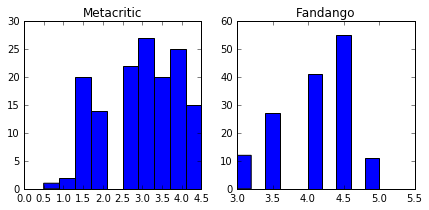

In [2]:
#enables plotting in Jupyter Notebook 
%matplotlib inline 

#create figure object to create histograms as subplots
fig = plt.figure(figsize=(7,3))   

#first subplot for Metacritic scores
ax1 = fig.add_subplot(1,2,1)
ax1.hist(movies["Metacritic_norm_round"])
ax1.set_title("Metacritic")

#second subplot for Fandango scores
ax2 = fig.add_subplot(1,2,2)
ax2.hist(movies["Fandango_Stars"])
ax2.set_title("Fandango")
plt.show()

Findings
- Metacritic seems to have a wider varition of scores than Fandango. In addition, Fandango does not have any scores below 3.0, which is questionable and possibly worth further investigation. 

## Mean, Median, and Standard Deviation

In [3]:
#mean of fandango and metacritic scores
mean_fandango = np.mean(movies["Fandango_Stars"])
mean_metacritic = np.mean(movies["Metacritic_norm_round"])

#median of fandango and metacritic scores
median_fandango = np.median(movies["Fandango_Stars"])
median_metacritic = np.median(movies["Metacritic_norm_round"])

#standard deviation of fandango and metacritic scores
std_fandango = np.std(movies["Fandango_Stars"])
std_metacritic = np.std(movies["Metacritic_norm_round"])

print("mean_fandango: " + str(mean_fandango))
print("mean_metacritic: " + str(mean_metacritic))
print("median_fandango: " + str(median_fandango))
print("median_metacritic: " + str(median_metacritic))
print("std_fandango: " + str(std_fandango))
print("std_metacritic: " + str(std_metacritic))

mean_fandango: 4.08904109589
mean_metacritic: 2.97260273973
median_fandango: 4.0
median_metacritic: 3.0
std_fandango: 0.53853216127
std_metacritic: 0.987561029704


Observations
- The median Metacritic value is higher than the mean because there are some low scores that skew it downward. 
- The median Fandango value is lower than the mean because as we previously observed, there are many high ratings in the Fandango set, and correspondingly, there are some high ratings that skew the mean upward. 
- The standard deviation for Fandango is much lower than the standard deviation for Metacritic because the ratings for Fandango range from 3 to 5, whereas Metacritic ratings span the entire range from 0 to 5. 
- 

## Scatterplots

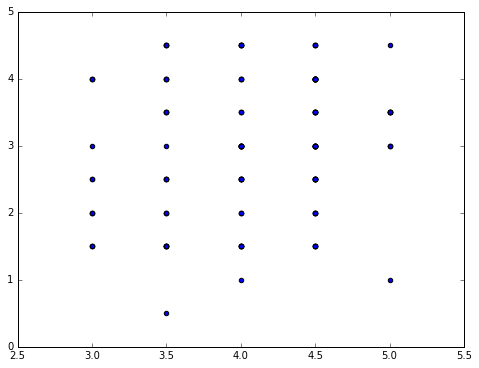

In [4]:
#create scatterplot comparing Fandango vs Metacritic
fig =  plt.figure(figsize=(8,6))
plt.scatter(movies["Fandango_Stars"], movies["Metacritic_norm_round"])
plt.show()


## Calculating Differences

In [5]:
#create new column calculating diff between metacritic and fandango ratings
movies["fm_diff"] = movies["Metacritic_norm_round"] - movies["Fandango_Stars"]

#calculate absolute value of fm_diff column
movies["fm_diff"] = np.absolute(movies["fm_diff"])



In [6]:
#sort movies on the fm_diff column in descending order
movies = movies.sort_values(["fm_diff"], ascending=False)

movies.head() #display the top 5 movies with the largest diff

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,fm_diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5,4.0
85,Little Boy (2015),20,81,30,5.9,7.4,4.5,4.3,1.00,4.05,...,1.0,4.0,1.5,3.0,3.5,38,5927,811,0.2,3.0
47,Annie (2014),27,61,33,4.8,5.2,4.5,4.2,1.35,3.05,...,1.5,3.0,1.5,2.5,2.5,108,19222,6835,0.3,3.0
19,Pixels (2015),17,54,27,5.3,5.6,4.5,4.1,0.85,2.70,...,1.0,2.5,1.5,2.5,3.0,246,19521,3886,0.4,3.0
134,The Longest Ride (2015),31,73,33,4.8,7.2,4.5,4.5,1.55,3.65,...,1.5,3.5,1.5,2.5,3.5,49,25214,2603,0.0,3.0


## Correlations

In [7]:
from scipy.stats import pearsonr

#calculate pearson's r, storing r-value and p-value in the respective variables defined
rval, pval = pearsonr(movies["Fandango_Stars"], movies["Metacritic_norm_round"])
print("r value: " + str(rval))

r value: 0.178449190739


Finding: The low correlation between Metacritic and Fandango ratings shows how different the two rating systems are. As we have previously seen, Fandango seems to inflate movie ratings overall. 

In [18]:
from scipy.stats import linregress

#creating a linear regression
slope, intercept, r_value, p_value, stderr_slope = linregress(movies["Metacritic_norm_round"], movies["Fandango_Stars"])
print(slope)
print(intercept)

#predicting a value for Fandango based on a 3.0 in Metacritic
pred_3 = 3 * slope + intercept
print("Predicted Fandango Value: " + str(pred_3))

0.0973110779739
3.7997739189
Predicted Fandango Value: 4.09170715282


## Finding Residuals 

In [19]:
#predicting a value for Fandango based on a 1.0 in Metacritic
pred_1 = 1 * slope + intercept
print("Predicted Fandango Value: " + str(pred_1))

#predicting a value for Fandango based on a 5.0 in Metacritic
pred_5 = 5 * slope + intercept
print("Predicted Fandango Value: " + str(pred_5))

Predicted Fandango Value: 3.89708499687
Predicted Fandango Value: 4.28632930877


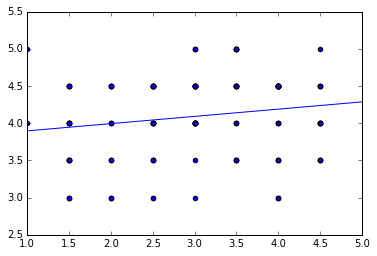

In [20]:
plt.scatter(movies["Metacritic_norm_round"], movies["Fandango_Stars"])
plt.plot([1.0, 5.0],[pred_1, pred_5])
plt.xlim(1, 5)
plt.show()